In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [212]:
data = pd.read_csv('traffic-collision-data-from-2010-to-present.csv')

In [213]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191713007,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,1040,17,Devonshire,1788,997,TRAFFIC COLLISION,NaN,...,STREET,BALBOA BL,PARTHENIA ST,"{'latitude': '34.2285', 'human_address': '{""ad...",18914.0,119.0,1424.0,NaN,2.0,65.0
1,191913696,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,850,19,Mission,1924,997,TRAFFIC COLLISION,NaN,...,STREET,CREST KNOLL AV,EDGECLIFF DR,"{'latitude': '34.2905', 'human_address': '{""ad...",18912.0,57.0,244.0,NaN,1.0,47.0
2,191611704,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,910,16,Foothill,1693,997,TRAFFIC COLLISION,NaN,...,STREET,SATICOY ST,LAURELGROVE AV,"{'latitude': '34.2085', 'human_address': '{""ad...",8888.0,153.0,472.0,NaN,5.0,14.0
3,191913694,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,700,19,Mission,1964,997,TRAFFIC COLLISION,NaN,...,STREET,TOBIAS AV,NORDHOFF ST,"{'latitude': '34.2354', 'human_address': '{""ad...",19730.0,134.0,417.0,NaN,3.0,59.0
4,191514323,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,1200,15,N Hollywood,1513,997,TRAFFIC COLLISION,NaN,...,STREET,SHERMAN WY,BELLAIRE AV,"{'latitude': '34.2012', 'human_address': '{""ad...",8888.0,180.0,1503.0,NaN,5.0,71.0


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481568 entries, 0 to 481567
Data columns (total 24 columns):
DR Number                            481568 non-null int64
Date Reported                        481568 non-null object
Date Occurred                        481568 non-null object
Time Occurred                        481568 non-null int64
Area ID                              481568 non-null int64
Area Name                            481568 non-null object
Reporting District                   481568 non-null int64
Crime Code                           481568 non-null int64
Crime Code Description               481568 non-null object
MO Codes                             396722 non-null object
Victim Age                           404022 non-null float64
Victim Sex                           474522 non-null object
Victim Descent                       473786 non-null object
Premise Code                         481543 non-null float64
Premise Description                  481543 non-null

#### LA Specific Plans and MO Codes column will be dropped because there are too many missing value

In [215]:
data.drop(['LA Specific Plans','MO Codes'],axis='columns',inplace=True)

In [216]:
data['Date Reported'] = pd.to_datetime(data['Date Reported'])

In [217]:
data['Time Occurred'] = data['Time Occurred'].apply(str)

In [218]:
for i in range(1,5):
    if i == 4:
        four = data.loc[data['Time Occurred'].str.len() == 4,'Time Occurred'].apply(lambda x: x[:2] + ':' + x[2:] )
    elif i == 3:
        three = data.loc[data['Time Occurred'].str.len() == 3,'Time Occurred'].apply(lambda x: '0' + x[0] + ':' + x[1:] )
    elif i == 2:
        two = data.loc[data['Time Occurred'].str.len() == 2,'Time Occurred'].apply(lambda x: '00' +  ':' + x[:] )
    elif i == 1:
        one = data.loc[data['Time Occurred'].str.len() == 1,'Time Occurred'].apply(lambda x: '00' + ':0' + x[:] )


In [219]:
one = pd.DataFrame(one)
two = pd.DataFrame(two)
three = pd.DataFrame(three)
four = pd.DataFrame(four)
time_occurred = pd.concat([one,two,three,four]).sort_index()

In [220]:
data['Time Occurred'] = time_occurred

In [221]:
data['Date Occurred'] = data['Date Occurred'].str.replace('T00:00:00.000','')

In [222]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,...,Premise Code,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,Council Districts,Neighborhood Councils (Certified)
0,191713007,2019-07-20,2019-07-20,10:40,17,Devonshire,1788,997,TRAFFIC COLLISION,32.0,...,101.0,STREET,BALBOA BL,PARTHENIA ST,"{'latitude': '34.2285', 'human_address': '{""ad...",18914.0,119.0,1424.0,2.0,65.0
1,191913696,2019-07-20,2019-07-20,08:50,19,Mission,1924,997,TRAFFIC COLLISION,50.0,...,101.0,STREET,CREST KNOLL AV,EDGECLIFF DR,"{'latitude': '34.2905', 'human_address': '{""ad...",18912.0,57.0,244.0,1.0,47.0
2,191611704,2019-07-20,2019-07-20,09:10,16,Foothill,1693,997,TRAFFIC COLLISION,75.0,...,101.0,STREET,SATICOY ST,LAURELGROVE AV,"{'latitude': '34.2085', 'human_address': '{""ad...",8888.0,153.0,472.0,5.0,14.0
3,191913694,2019-07-20,2019-07-20,07:00,19,Mission,1964,997,TRAFFIC COLLISION,40.0,...,101.0,STREET,TOBIAS AV,NORDHOFF ST,"{'latitude': '34.2354', 'human_address': '{""ad...",19730.0,134.0,417.0,3.0,59.0
4,191514323,2019-07-20,2019-07-20,12:00,15,N Hollywood,1513,997,TRAFFIC COLLISION,27.0,...,101.0,STREET,SHERMAN WY,BELLAIRE AV,"{'latitude': '34.2012', 'human_address': '{""ad...",8888.0,180.0,1503.0,5.0,71.0


In [223]:
data['Date Occurred'] = pd.to_datetime(data['Date Occurred'].str.cat(data['Time Occurred'],sep=' '))

In [224]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,...,Premise Code,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,Council Districts,Neighborhood Councils (Certified)
0,191713007,2019-07-20,2019-07-20 10:40:00,10:40,17,Devonshire,1788,997,TRAFFIC COLLISION,32.0,...,101.0,STREET,BALBOA BL,PARTHENIA ST,"{'latitude': '34.2285', 'human_address': '{""ad...",18914.0,119.0,1424.0,2.0,65.0
1,191913696,2019-07-20,2019-07-20 08:50:00,08:50,19,Mission,1924,997,TRAFFIC COLLISION,50.0,...,101.0,STREET,CREST KNOLL AV,EDGECLIFF DR,"{'latitude': '34.2905', 'human_address': '{""ad...",18912.0,57.0,244.0,1.0,47.0
2,191611704,2019-07-20,2019-07-20 09:10:00,09:10,16,Foothill,1693,997,TRAFFIC COLLISION,75.0,...,101.0,STREET,SATICOY ST,LAURELGROVE AV,"{'latitude': '34.2085', 'human_address': '{""ad...",8888.0,153.0,472.0,5.0,14.0
3,191913694,2019-07-20,2019-07-20 07:00:00,07:00,19,Mission,1964,997,TRAFFIC COLLISION,40.0,...,101.0,STREET,TOBIAS AV,NORDHOFF ST,"{'latitude': '34.2354', 'human_address': '{""ad...",19730.0,134.0,417.0,3.0,59.0
4,191514323,2019-07-20,2019-07-20 12:00:00,12:00,15,N Hollywood,1513,997,TRAFFIC COLLISION,27.0,...,101.0,STREET,SHERMAN WY,BELLAIRE AV,"{'latitude': '34.2012', 'human_address': '{""ad...",8888.0,180.0,1503.0,5.0,71.0


In [225]:
data.drop(['Area ID','Premise Code','Census Tracts','Precinct Boundaries','Council Districts','Neighborhood Councils (Certified)'
          ,'Crime Code','Crime Code Description','Time Occurred'],axis=1,inplace=True)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481568 entries, 0 to 481567
Data columns (total 14 columns):
DR Number              481568 non-null int64
Date Reported          481568 non-null datetime64[ns]
Date Occurred          481568 non-null datetime64[ns]
Time Occurred          481568 non-null object
Area Name              481568 non-null object
Reporting District     481568 non-null int64
Victim Age             404022 non-null float64
Victim Sex             474522 non-null object
Victim Descent         473786 non-null object
Premise Description    481543 non-null object
Address                481568 non-null object
Cross Street           460022 non-null object
Location               481568 non-null object
Zip Codes              481170 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)
memory usage: 51.4+ MB


In [227]:
data['Victim Sex'].unique()

array(['F', 'M', 'X', nan, 'N', 'H'], dtype=object)

In [228]:
data.loc[data['Victim Sex'].isnull(),'Victim Sex'] = 'X'
data.loc[data['Victim Sex']=='N','Victim Sex'] = 'X'
data.loc[data['Victim Sex']=='H','Victim Sex'] = 'X'

In [229]:
data['Victim Sex'] = data['Victim Sex'].astype('category',categories=['F','M','X'])

In [230]:
data.describe()

,DR Number,Reporting District,Victim Age,Zip Codes
count,4.815680e+05,481568.000000,404022.000000,481170.000000
mean,1.466924e+08,1153.043846,41.547139,20174.714513
std,2.762947e+07,588.979929,16.197300,6025.297527
min,1.001000e+08,100.000000,10.000000,2436.000000
25%,1.214262e+08,666.000000,29.000000,19339.000000
50%,1.506238e+08,1149.000000,39.000000,23074.000000
75%,1.710118e+08,1651.000000,51.000000,23668.000000
max,1.921131e+08,2199.000000,99.000000,27324.000000


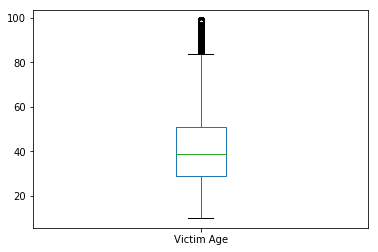

In [231]:
data['Victim Age'].plot(kind='box')
plt.show()

In [232]:
data['Victim Age'] = data['Victim Age'].fillna(data['Victim Age'].median())

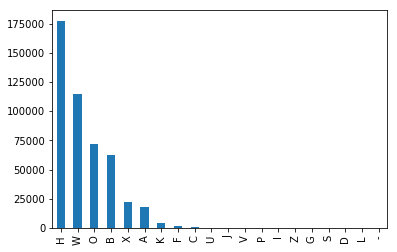

In [233]:
data['Victim Descent'].dropna().value_counts().plot(kind='bar')
plt.show()

In [234]:
data['Victim Descent'] = data['Victim Descent'].fillna('Z')

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481568 entries, 0 to 481567
Data columns (total 14 columns):
DR Number              481568 non-null int64
Date Reported          481568 non-null datetime64[ns]
Date Occurred          481568 non-null datetime64[ns]
Time Occurred          481568 non-null object
Area Name              481568 non-null object
Reporting District     481568 non-null int64
Victim Age             481568 non-null float64
Victim Sex             481568 non-null category
Victim Descent         481568 non-null object
Premise Description    481543 non-null object
Address                481568 non-null object
Cross Street           460022 non-null object
Location               481568 non-null object
Zip Codes              481170 non-null float64
dtypes: category(1), datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 48.2+ MB


In [236]:
cleaned_data = data.dropna()

In [237]:
cleaned_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Reporting District,Victim Age,Victim Sex,Victim Descent,Premise Description,Address,Cross Street,Location,Zip Codes
0,191713007,2019-07-20,2019-07-20 10:40:00,10:40,Devonshire,1788,32.0,F,W,STREET,BALBOA BL,PARTHENIA ST,"{'latitude': '34.2285', 'human_address': '{""ad...",18914.0
1,191913696,2019-07-20,2019-07-20 08:50:00,08:50,Mission,1924,50.0,M,O,STREET,CREST KNOLL AV,EDGECLIFF DR,"{'latitude': '34.2905', 'human_address': '{""ad...",18912.0
2,191611704,2019-07-20,2019-07-20 09:10:00,09:10,Foothill,1693,75.0,M,O,STREET,SATICOY ST,LAURELGROVE AV,"{'latitude': '34.2085', 'human_address': '{""ad...",8888.0
3,191913694,2019-07-20,2019-07-20 07:00:00,07:00,Mission,1964,40.0,M,H,STREET,TOBIAS AV,NORDHOFF ST,"{'latitude': '34.2354', 'human_address': '{""ad...",19730.0
4,191514323,2019-07-20,2019-07-20 12:00:00,12:00,N Hollywood,1513,27.0,M,W,STREET,SHERMAN WY,BELLAIRE AV,"{'latitude': '34.2012', 'human_address': '{""ad...",8888.0


In [238]:
df = cleaned_data.loc[:,'Date Occurred':'Cross Street']

In [239]:
df.head()

,Date Occurred,Time Occurred,Area Name,Reporting District,Victim Age,Victim Sex,Victim Descent,Premise Description,Address,Cross Street
0,2019-07-20 10:40:00,10:40,Devonshire,1788,32.0,F,W,STREET,BALBOA BL,PARTHENIA ST
1,2019-07-20 08:50:00,08:50,Mission,1924,50.0,M,O,STREET,CREST KNOLL AV,EDGECLIFF DR
2,2019-07-20 09:10:00,09:10,Foothill,1693,75.0,M,O,STREET,SATICOY ST,LAURELGROVE AV
3,2019-07-20 07:00:00,07:00,Mission,1964,40.0,M,H,STREET,TOBIAS AV,NORDHOFF ST
4,2019-07-20 12:00:00,12:00,N Hollywood,1513,27.0,M,W,STREET,SHERMAN WY,BELLAIRE AV


In [240]:
df = df.set_index('Date Occurred')

In [241]:
table = pd.crosstab(df['Premise Description'],df['Victim Sex']).sort_values(by=['F','M','X'],ascending=False)
table['M'] = table['M'].apply(lambda x: x/table['M'].sum())
table['F'] = table['F'].apply(lambda x: x/table['F'].sum())
table['X'] = table['X'].apply(lambda x: x/table['X'].sum())

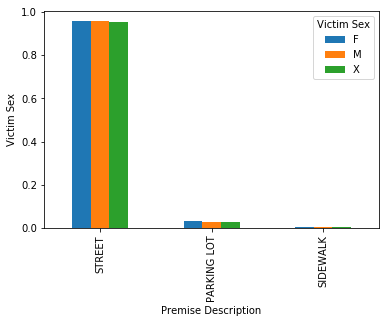

In [242]:
plt.figure(figsize=(12,10))
table[0:3].plot(kind='bar')
plt.ylabel('Victim Sex')
plt.show()

In [271]:
mapping = {}
for i in range(5):
    mapping[i] = 'Night'
for i in range(5,13):
    mapping[i] = 'Morning'
for i in range(13,18):
    mapping[i] = 'Afternoon'
for i in range(18,24):
    mapping[i] = 'Evening'
    

In [404]:
victim_per_hour = df.groupby(df.index.hour)['Victim Sex'].value_counts()

In [405]:
def mapping_day(victim):
    mapping = {'Night':0,'Morning':0,'Afternoon':0,'Evening':0}
    for i in range(5):
        mapping['Night'] = mapping['Night'] + victim[i]
    for i in range(5,13):
        mapping['Morning'] = mapping['Morning'] + victim[i]
    for i in range(13,18):
        mapping['Afternoon'] = mapping['Afternoon'] + victim[i]
    for i in range(18,24):
        mapping['Evening'] = mapping['Evening'] + victim[i]
    return mapping

In [406]:
victim_hour_gender = pd.DataFrame(mapping_day(victim_per_hour))

In [407]:
victim_hour_gender

,Afternoon,Evening,Morning,Night
Victim Sex,,,,
M,80901,76794,81373,29654
F,58948,46049,57386,11996
X,4216,4564,4676,3059


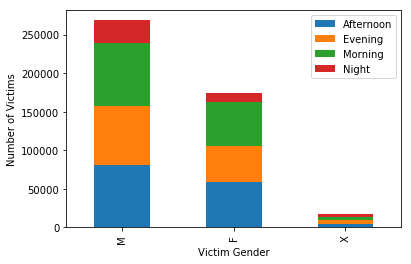

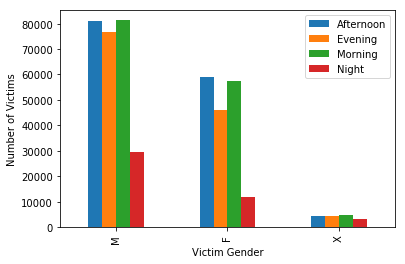

In [302]:
victim_hour_gender.plot(kind='bar',stacked=True)
plt.ylabel('Number of Victims')
plt.xlabel('Victim Gender')
victim_hour_gender.plot(kind='bar')
plt.ylabel('Number of Victims')
plt.xlabel('Victim Gender')
plt.show()

In [408]:
victim_per_hour = df.groupby(df.index.hour)['Area Name'].value_counts()

In [409]:
victim_hour_area = pd.DataFrame(mapping_day(victim_per_hour))

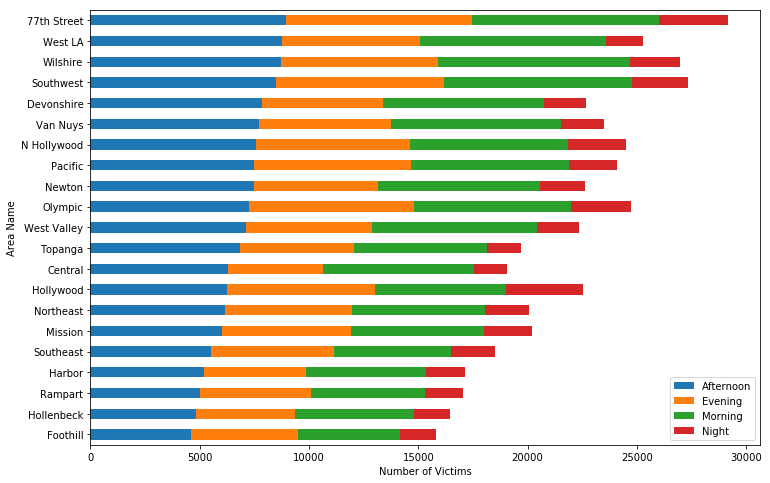

In [410]:
victim_hour_area.sort_values(by=['Afternoon','Evening','Morning','Night']).plot(kind='barh',stacked=True,figsize=(12,8))
plt.xlabel('Number of Victims')
plt.ylabel('Area Name')
plt.show()

In [436]:
df['Age'] = pd.DataFrame({'Age':[' ' for i in range(len(df))]})

In [440]:
df.loc[(df['Victim Age']>0) & (df['Victim Age']<15),'Age'] = 'Children'
df.loc[(df['Victim Age']>=15) & (df['Victim Age']<25),'Age'] = 'Youth'
df.loc[(df['Victim Age']>=25) & (df['Victim Age']<45),'Age'] = 'Adult'
df.loc[(df['Victim Age']>=45),'Age'] = 'Old'

In [446]:
df['Age'].unique()

array(['Adult', 'Old', 'Youth', 'Children'], dtype=object)

In [399]:
df.head()

,Time Occurred,Area Name,Reporting District,Victim Age,Victim Sex,Victim Descent,Premise Description,Address,Cross Street,Age
Date Occurred,,,,,,,,,,
2019-07-20 10:40:00,10:40,Devonshire,1788,32.0,F,W,STREET,BALBOA BL,PARTHENIA ST,Adult
2019-07-20 08:50:00,08:50,Mission,1924,50.0,M,O,STREET,CREST KNOLL AV,EDGECLIFF DR,Old
2019-07-20 09:10:00,09:10,Foothill,1693,75.0,M,O,STREET,SATICOY ST,LAURELGROVE AV,Old
2019-07-20 07:00:00,07:00,Mission,1964,40.0,M,H,STREET,TOBIAS AV,NORDHOFF ST,Adult
2019-07-20 12:00:00,12:00,N Hollywood,1513,27.0,M,W,STREET,SHERMAN WY,BELLAIRE AV,Adult


In [451]:
victim_per_hour = df.groupby(df.index.hour)['Age'].value_counts()

In [448]:
victim_age_hour = pd.DataFrame(mapping_day(victim_per_hour))

In [454]:
victim_age_hour.head()

,Afternoon,Evening,Morning,Night
Adult,77917,74478.0,77384.0,29328.0
Children,17,NaN,NaN,NaN
Old,50272,36655.0,52387.0,9876.0
Youth,15859,16266.0,13652.0,5505.0


In [455]:
victim_age_hour = victim_age_hour.fillna(0)

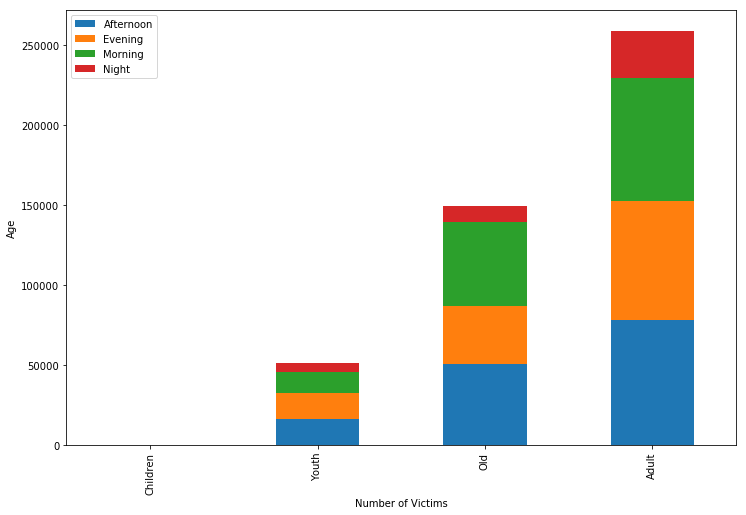

In [457]:
victim_age_hour.sort_values(by=['Afternoon','Evening','Morning','Night']).plot(kind='bar',stacked=True,figsize=(12,8))
plt.xlabel('Number of Victims')
plt.ylabel('Age')
plt.show()

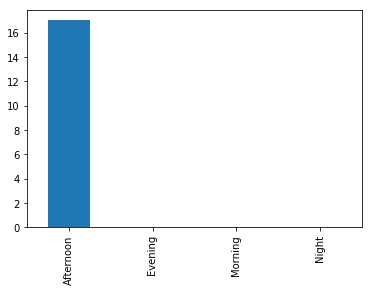

In [461]:
victim_age_hour.loc['Children'].plot(kind='bar')
plt.show()

#### Kesimpulan:
1. Paling banyak kecelakaan terjadi pada STREET (jalanan) dengan persentase ~90%
2. Korban paling banyak adalah laki-laki
3. Urutan terbanyak kecelakaan adalah afternoon, morning, evening, night
4. 3 area paling banyak terjadi kecelakaan adalah 77th Street, Southwest, Wilshire
5. Paling banyak mengalami kecelakaan adalah orang dewasa (adult), masuk akal karena paling banyak beraktivitas dibanding yang lain